In [286]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.metrics import root_mean_squared_error , r2_score 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [287]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [288]:
# Data Set: FD001
# Train trjectories: 100
# Test trajectories: 100
# Conditions: ONE (Sea Level)
# Fault Modes: ONE (HPC Degradation)

data_train = pd.read_csv(f'./train_FD001.txt', delim_whitespace=True, header=None);

C:\Users\amalv\AppData\Local\Temp\ipykernel_7692\4116767122.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_train = pd.read_csv(f'./train_FD001.txt', delim_whitespace=True, header=None);


columns = [
    'unit_number', 'cycle_time', 'operational_setting_1', 'operational_setting_2',
    'operational_setting_3', 'sensor_measurement_1', 'sensor_measurement_2',
    'sensor_measurement_3', 'sensor_measurement_4', 'sensor_measurement_5',
    'sensor_measurement_6', 'sensor_measurement_7', 'sensor_measurement_8',
    'sensor_measurement_9', 'sensor_measurement_10', 'sensor_measurement_11',
    'sensor_measurement_12', 'sensor_measurement_13', 'sensor_measurement_14',
    'sensor_measurement_15', 'sensor_measurement_16', 'sensor_measurement_17',
    'sensor_measurement_18', 'sensor_measurement_19', 'sensor_measurement_20',
    'sensor_measurement_21', 'sensor_measurement_22', 'sensor_measurement_23',
    'sensor_measurement_24', 'sensor_measurement_25', 'sensor_measurement_26'
]

In [289]:
columns = [
    'engine', 'cycle_time', 'operational_setting_1', 'operational_setting_2',
    'operational_setting_3', 'sm1', 'sm2', 'sm3', 'sm4', 'sm5', 'sm6', 'sm7', 'sm8',
    'sm9', 'sm10', 'sm11', 'sm12', 'sm13', 'sm14', 'sm15', 'sm16', 'sm17', 'sm18',
    'sm19', 'sm20', 'sm21'
]

data_train.columns = columns


data_train.head()

,engine,cycle_time,operational_setting_1,operational_setting_2,operational_setting_3,sm1,sm2,sm3,sm4,sm5,...,sm12,sm13,sm14,sm15,sm16,sm17,sm18,sm19,sm20,sm21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


<!-- {'sm_1': '(Fan inlet temperature) (◦R)',
 'sm_2': '(LPC outlet temperature) (◦R)',
 'sm_3': '(HPC outlet temperature) (◦R)',
 'sm_4': '(LPT outlet temperature) (◦R)',
 'sm_5': '(Fan inlet Pressure) (psia)',
 'sm_6': '(bypass-duct pressure) (psia)',
 'sm_7': '(HPC outlet pressure) (psia)',
 'sm_8': '(Physical fan speed) (rpm)',
 'sm_9': '(Physical core speed) (rpm)',
 'sm_10': '(Engine pressure ratio(P50/P2)',
 'sm_11': '(HPC outlet Static pressure) (psia)',
 'sm_12': '(Ratio of fuel flow to Ps30) (pps/psia)',
 'sm_13': '(Corrected fan speed) (rpm)',
 'sm_14': '(Corrected core speed) (rpm)',
 'sm_15': '(Bypass Ratio) ',
 'sm_16': '(Burner fuel-air ratio)',
 'sm_17': '(Bleed Enthalpy)',
 'sm_18': '(Required fan speed)',
 'sm_19': '(Required fan conversion speed)',
 'sm_20': '(High-pressure turbines Cool air flow)',
 'sm_21': '(Low-pressure turbines Cool air flow)'} -->

In [290]:
# {'sm_1': '(Fan inlet temperature) (◦R)',
#  'sm_2': '(LPC outlet temperature) (◦R)',
#  'sm_3': '(HPC outlet temperature) (◦R)',
#  'sm_4': '(LPT outlet temperature) (◦R)',
#  'sm_5': '(Fan inlet Pressure) (psia)',
#  'sm_6': '(bypass-duct pressure) (psia)',
#  'sm_7': '(HPC outlet pressure) (psia)',
#  'sm_8': '(Physical fan speed) (rpm)',
#  'sm_9': '(Physical core speed) (rpm)',
#  'sm_10': '(Engine pressure ratio(P50/P2)',
#  'sm_11': '(HPC outlet Static pressure) (psia)',
#  'sm_12': '(Ratio of fuel flow to Ps30) (pps/psia)',
#  'sm_13': '(Corrected fan speed) (rpm)',
#  'sm_14': '(Corrected core speed) (rpm)',
#  'sm_15': '(Bypass Ratio) ',
#  'sm_16': '(Burner fuel-air ratio)',
#  'sm_17': '(Bleed Enthalpy)',
#  'sm_18': '(Required fan speed)',
#  'sm_19': '(Required fan conversion speed)',
#  'sm_20': '(High-pressure turbines Cool air flow)',
#  'sm_21': '(Low-pressure turbines Cool air flow)'}

In [291]:
data_test = pd.read_csv("./test_FD001.txt", delim_whitespace=True, header = None, names=columns)
y_val = pd.read_csv("./RUL_FD001.txt", header = None, names=["RUL"])

data_test.head()

C:\Users\amalv\AppData\Local\Temp\ipykernel_7692\4153390612.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_test = pd.read_csv("./test_FD001.txt", delim_whitespace=True, header = None, names=columns)


,engine,cycle_time,operational_setting_1,operational_setting_2,operational_setting_3,sm1,sm2,sm3,sm4,sm5,...,sm12,sm13,sm14,sm15,sm16,sm17,sm18,sm19,sm20,sm21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


In [292]:
y_val.head()

,RUL
0,112
1,98
2,69
3,82
4,91


In [293]:
print(f"train_shape : {data_train.shape},  test_shape : {data_test.shape}, yval shape : {y_val.shape}")

train_shape : (20631, 26),  test_shape : (13096, 26), yval shape : (100, 1)


prediction of RUL failure point of engines solve with linear regression models , DTs regression , random forest , XGBoost

In [294]:
df_info = pd.concat([data_train.isnull().sum(), data_train.nunique(), data_train.dtypes], axis=1)
df_info.columns = ['missing values', 'no : of unique value', 'data type']
df_info

,missing values,no : of unique value,data type
engine,0,100,int64
cycle_time,0,362,int64
operational_setting_1,0,158,float64
operational_setting_2,0,13,float64
operational_setting_3,0,1,float64
sm1,0,1,float64
sm2,0,310,float64
sm3,0,3012,float64
sm4,0,4051,float64
sm5,0,1,float64


In [295]:
data_train['sm6'].unique()

array([21.61, 21.6 ])

some of the columns are constant or having only 1 value, and 2 so wee neeed to see the standard deviaton to see if its constant or small deviation

In [296]:
data_train['sm6'].std()

0.0013889849127073112

In [297]:
data_train['sm18'].std()

0.0

so we are dorping the colums that haveing std less that .02

In [298]:
def constant_feature(df):
    constant_col = []
    for col in df.columns:
        if abs(df[col].std() < .02):
            constant_col.append(col)
    return constant_col

In [299]:

df_train = data_train.copy()
df_val = data_test.copy()

In [300]:
df_train.drop(columns = constant_feature(df_train), axis = 1, inplace = True)
df_val.drop(columns = constant_feature(df_val), axis = 1, inplace = True)

In [301]:
df_train.columns

Index(['engine', 'cycle_time', 'sm2', 'sm3', 'sm4', 'sm7', 'sm8', 'sm9',
       'sm11', 'sm12', 'sm13', 'sm14', 'sm15', 'sm17', 'sm20', 'sm21'],
      dtype='object')

In [302]:
df_val.columns

Index(['engine', 'cycle_time', 'sm2', 'sm3', 'sm4', 'sm7', 'sm8', 'sm9',
       'sm11', 'sm12', 'sm13', 'sm14', 'sm15', 'sm17', 'sm20', 'sm21'],
      dtype='object')

# now we need to create RUL (Remaining usefull cycle)

In [303]:
df_train['RUL'] = df_train.groupby('engine')['cycle_time'].transform('max') - df_train['cycle_time']

df_train.head()

,engine,cycle_time,sm2,sm3,sm4,sm7,sm8,sm9,sm11,sm12,sm13,sm14,sm15,sm17,sm20,sm21,RUL
0,1,1,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,1,2,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,1,3,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,1,4,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,1,5,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187


<Axes: >

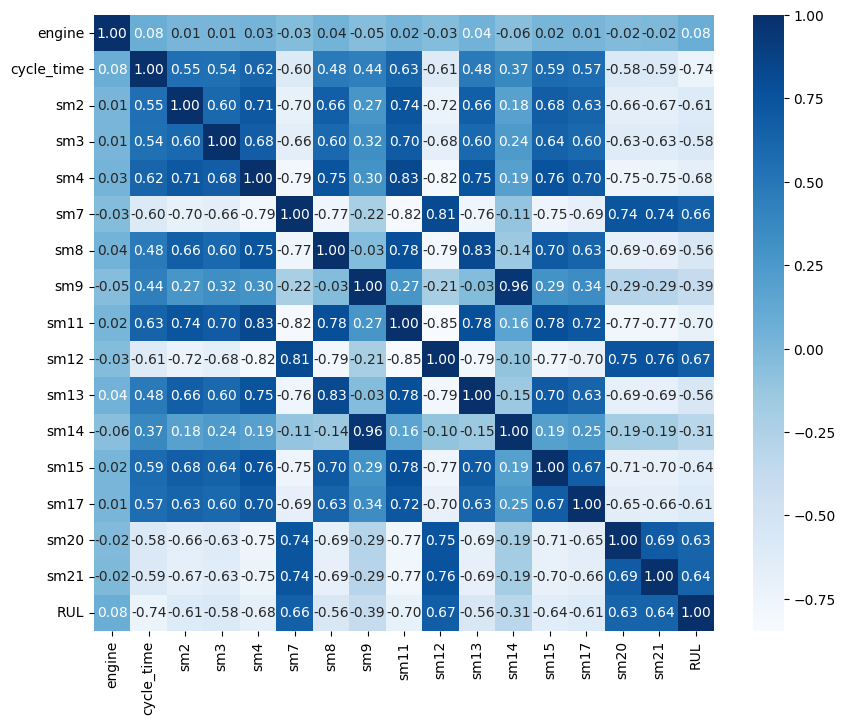

In [304]:
corre = df_train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corre, cmap = 'Blues', annot = True, fmt='.2f')

<Axes: >

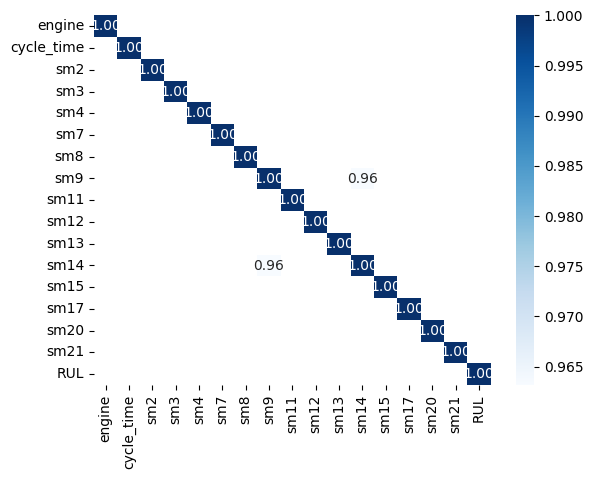

In [305]:
mask = corre.where(abs(corre) > .90 ).isna()
sns.heatmap(corre, cmap = 'Blues', annot = True, fmt='.2f', mask= mask)

In [306]:
df_train.drop(['sm9'], axis=1, inplace = True)


In [307]:
failure_time = df_train.groupby('engine')['RUL'].max()
failure_time

engine
1      191
2      286
3      178
4      188
5      268
      ... 
96     335
97     201
98     155
99     184
100    199
Name: RUL, Length: 100, dtype: int64

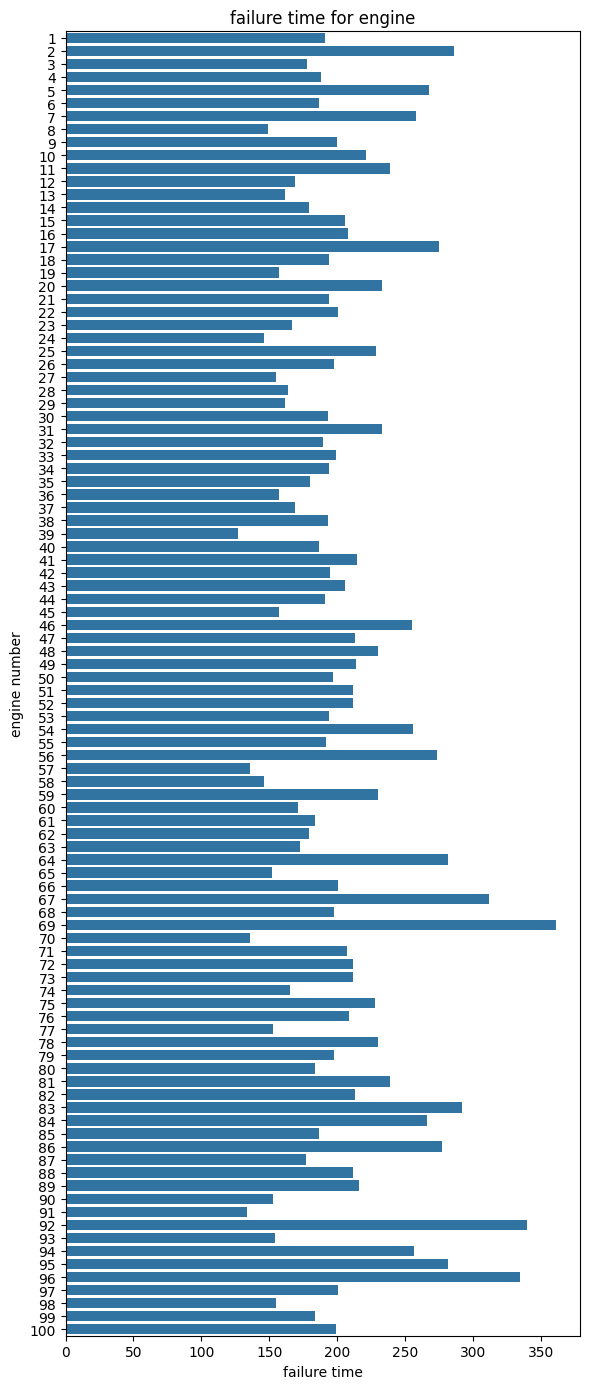

In [308]:
plt.figure(figsize = (6,14))
sns.barplot(y = failure_time.index , x = failure_time.values , orient='h')
plt.title('failure time for engine')
plt.xlabel('failure time')
plt.ylabel('engine number')
plt.tight_layout()
plt.show()

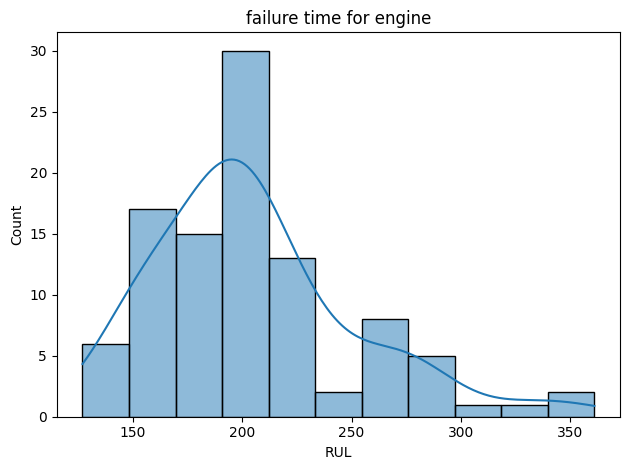

In [309]:
sns.histplot(failure_time , kde=True)
plt.title('failure time for engine')
plt.tight_layout()

In [310]:
df_train['engine'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100], dtype=int64)

Text(0, 0.5, 'LPC outlet temperature')

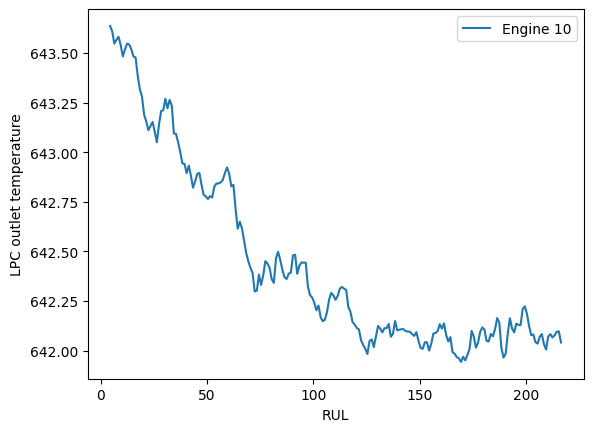

In [311]:
rolling_window = df_train[ df_train['engine']== 10].rolling(10).mean()
sns.lineplot( data = rolling_window , x = 'RUL' , y = 'sm2'  , label ="Engine 10")
plt.ylabel("LPC outlet temperature")

In [312]:
df_train.head()

,engine,cycle_time,sm2,sm3,sm4,sm7,sm8,sm11,sm12,sm13,sm14,sm15,sm17,sm20,sm21,RUL
0,1,1,641.82,1589.70,1400.60,554.36,2388.06,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,1,2,642.15,1591.82,1403.14,553.75,2388.04,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,1,3,642.35,1587.99,1404.20,554.26,2388.08,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,1,4,642.35,1582.79,1401.87,554.45,2388.11,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,1,5,642.37,1582.85,1406.22,554.00,2388.06,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187


In [313]:

Sensor_dictionary={}
dict_list=[ "(Fan inlet temperature) (◦R)",
"(LPC outlet temperature) (◦R)",
"(HPC outlet temperature) (◦R)",
"(LPT outlet temperature) (◦R)",
"(Fan inlet Pressure) (psia)",
"(bypass-duct pressure) (psia)",
"(HPC outlet pressure) (psia)",
"(Physical fan speed) (rpm)",
"(Physical core speed) (rpm)",
"(Engine pressure ratio(P50/P2)",
"(HPC outlet Static pressure) (psia)",
"(Ratio of fuel flow to Ps30) (pps/psia)",
"(Corrected fan speed) (rpm)",
"(Corrected core speed) (rpm)",
"(Bypass Ratio) ",
"(Burner fuel-air ratio)",
"(Bleed Enthalpy)",
"(Required fan speed)",
"(Required fan conversion speed)",
"(High-pressure turbines Cool air flow)",
"(Low-pressure turbines Cool air flow)" ]

i=1
for x in dict_list :
    Sensor_dictionary[f'sm{i}']=x
    i+=1
Sensor_dictionary

{'sm1': '(Fan inlet temperature) (◦R)',
 'sm2': '(LPC outlet temperature) (◦R)',
 'sm3': '(HPC outlet temperature) (◦R)',
 'sm4': '(LPT outlet temperature) (◦R)',
 'sm5': '(Fan inlet Pressure) (psia)',
 'sm6': '(bypass-duct pressure) (psia)',
 'sm7': '(HPC outlet pressure) (psia)',
 'sm8': '(Physical fan speed) (rpm)',
 'sm9': '(Physical core speed) (rpm)',
 'sm10': '(Engine pressure ratio(P50/P2)',
 'sm11': '(HPC outlet Static pressure) (psia)',
 'sm12': '(Ratio of fuel flow to Ps30) (pps/psia)',
 'sm13': '(Corrected fan speed) (rpm)',
 'sm14': '(Corrected core speed) (rpm)',
 'sm15': '(Bypass Ratio) ',
 'sm16': '(Burner fuel-air ratio)',
 'sm17': '(Bleed Enthalpy)',
 'sm18': '(Required fan speed)',
 'sm19': '(Required fan conversion speed)',
 'sm20': '(High-pressure turbines Cool air flow)',
 'sm21': '(Low-pressure turbines Cool air flow)'}

In [314]:
def plot(df, signal_name, sensor_dict):
    try:
        figure = plt.figure(figsize=(10, 5))
        
        for engine in df['engine'].unique():
            if engine % 10 == 0:
                rolling_window = df[df['engine'] == engine].rolling(10).mean()
                sns.lineplot(data=rolling_window, x='RUL', y=signal_name, label=f'Engine {engine}')
        
        plt.tight_layout()
        plt.xlim(250, 0)
        plt.xlabel("Remaining Useful Life")
        plt.ylabel(sensor_dict.get(signal_name, signal_name))  
        plt.show()
    except Exception as e:
        print(f"Error in plotting {signal_name}: {e}")
    finally:
        plt.close()


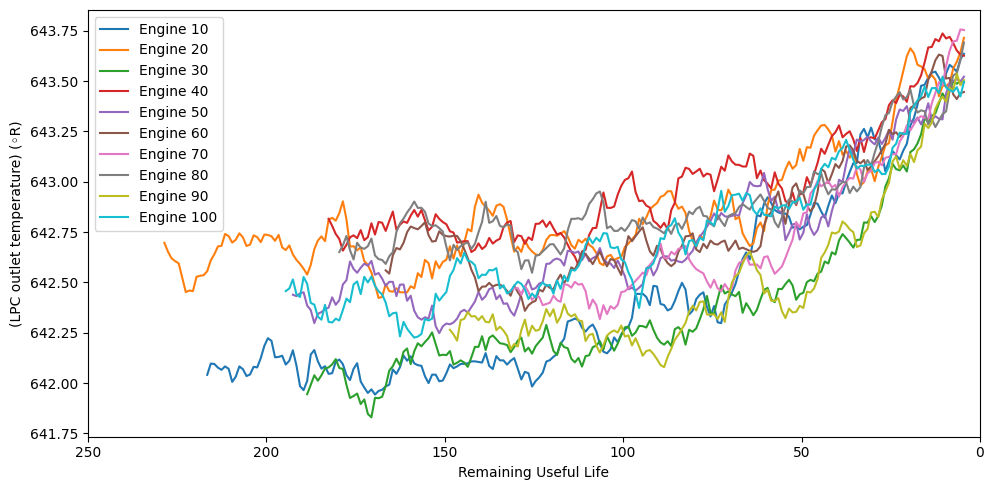

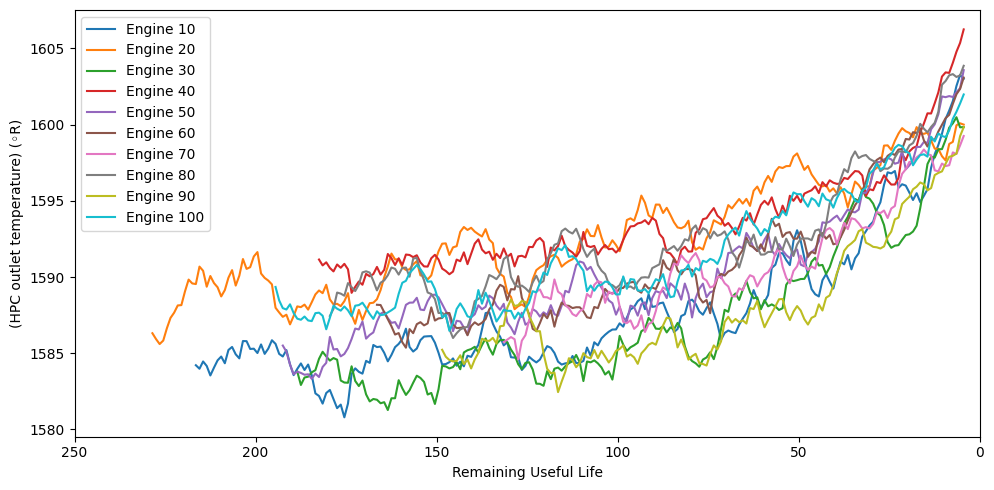

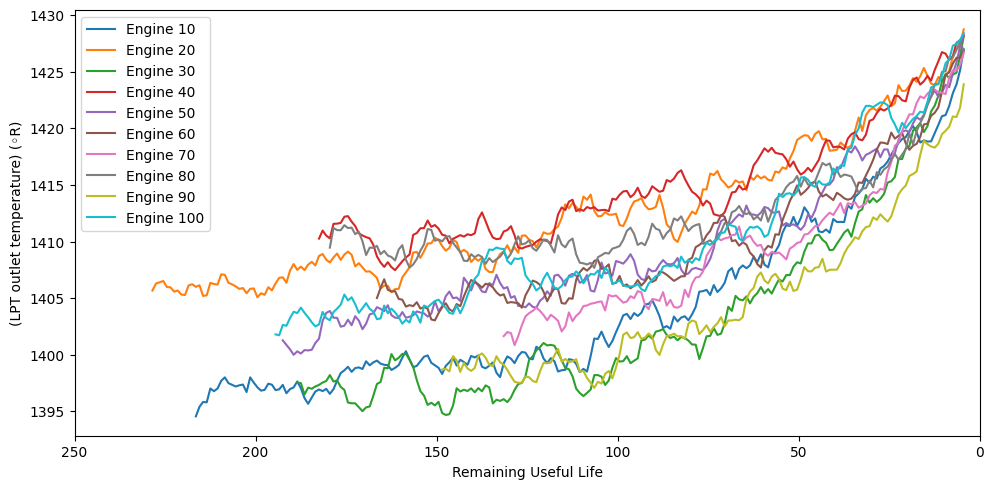

Error in plotting sm5: Could not interpret value `sm5` for `y`. An entry with this name does not appear in `data`.
Error in plotting sm6: Could not interpret value `sm6` for `y`. An entry with this name does not appear in `data`.


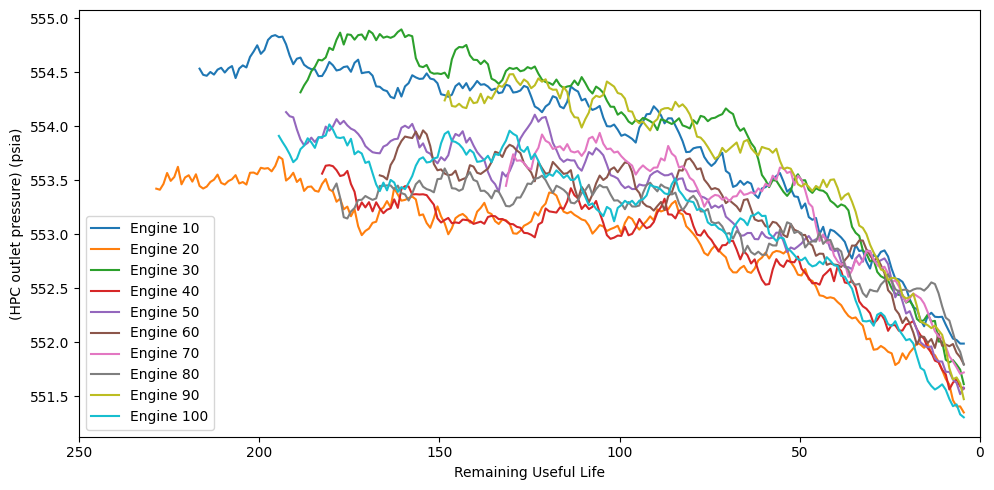

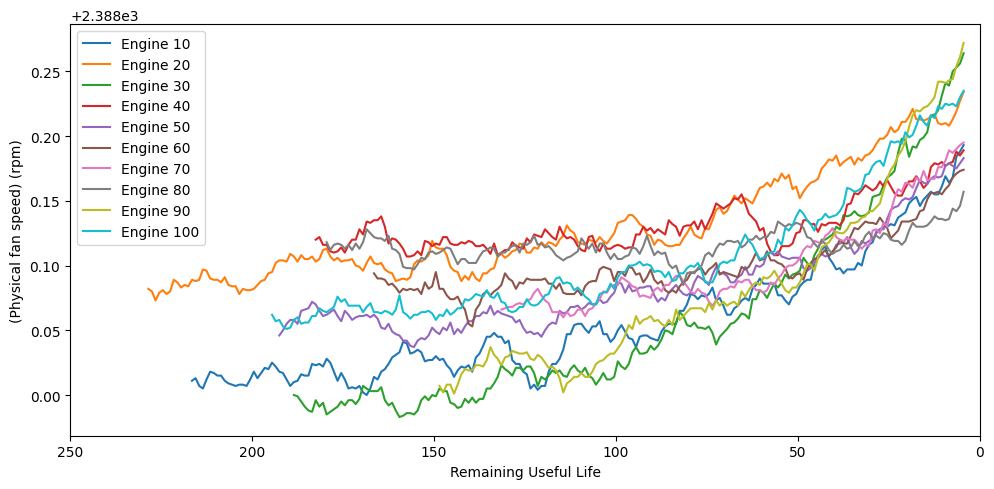

Error in plotting sm9: Could not interpret value `sm9` for `y`. An entry with this name does not appear in `data`.
Error in plotting sm10: Could not interpret value `sm10` for `y`. An entry with this name does not appear in `data`.


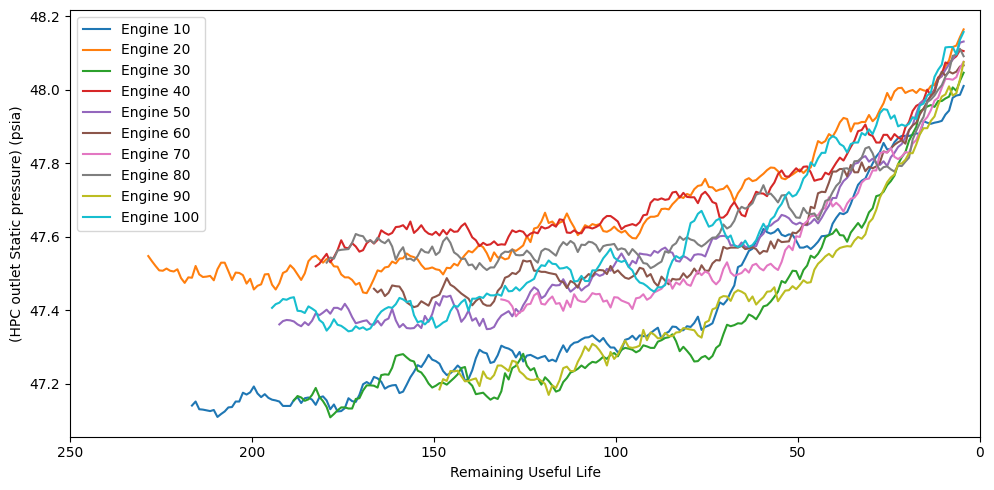

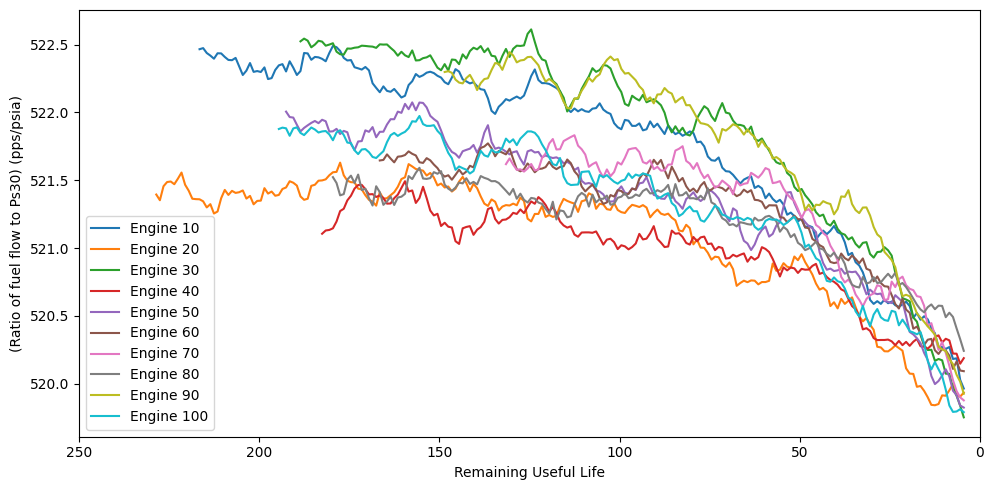

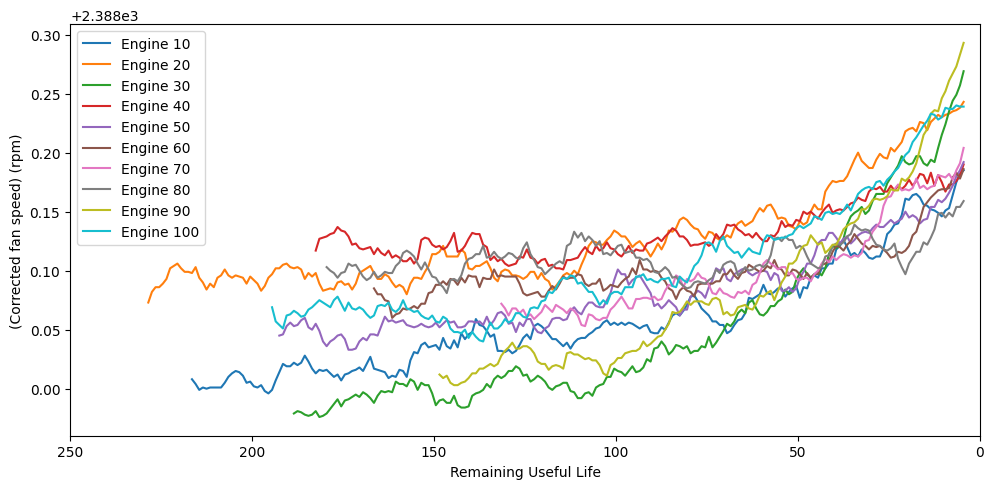

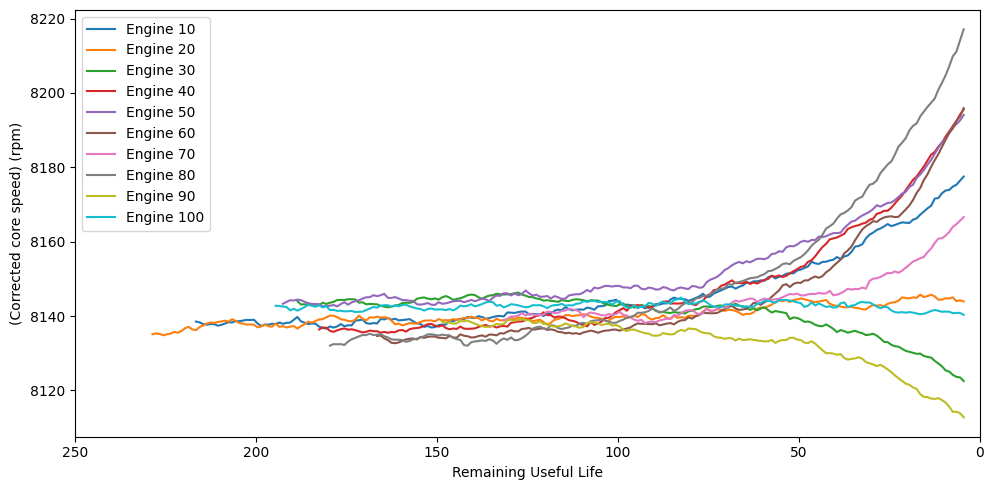

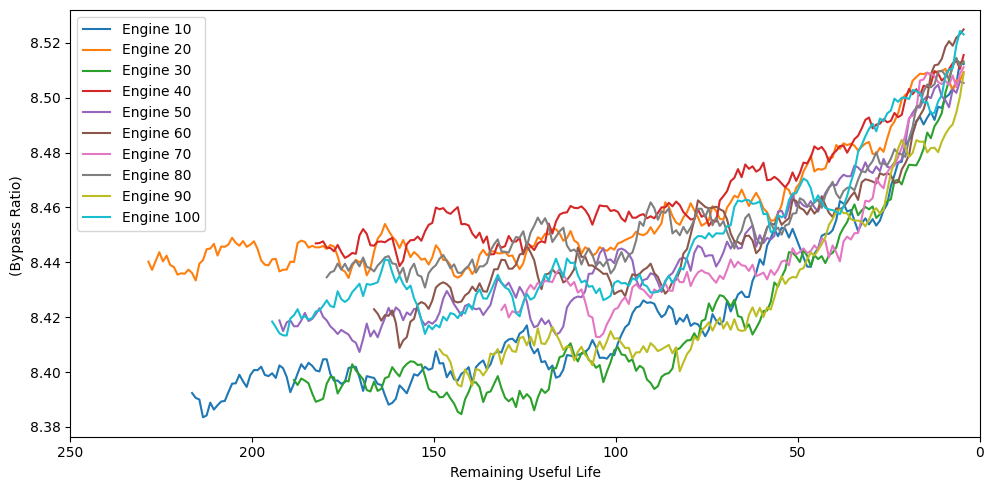

Error in plotting sm16: Could not interpret value `sm16` for `y`. An entry with this name does not appear in `data`.


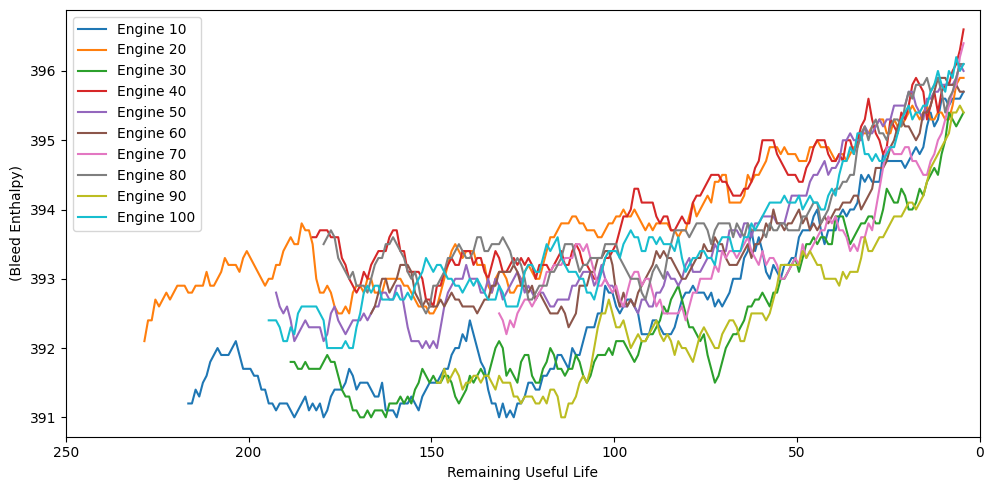

Error in plotting sm18: Could not interpret value `sm18` for `y`. An entry with this name does not appear in `data`.
Error in plotting sm19: Could not interpret value `sm19` for `y`. An entry with this name does not appear in `data`.


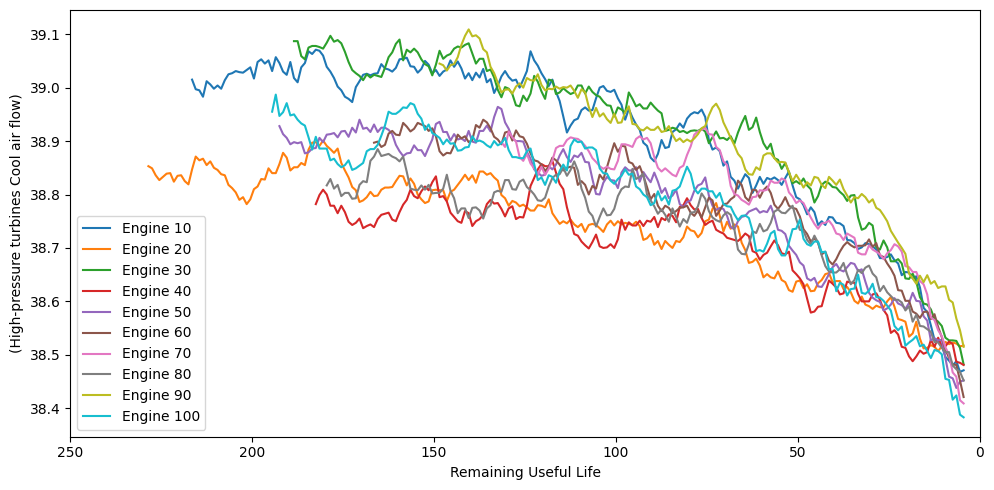

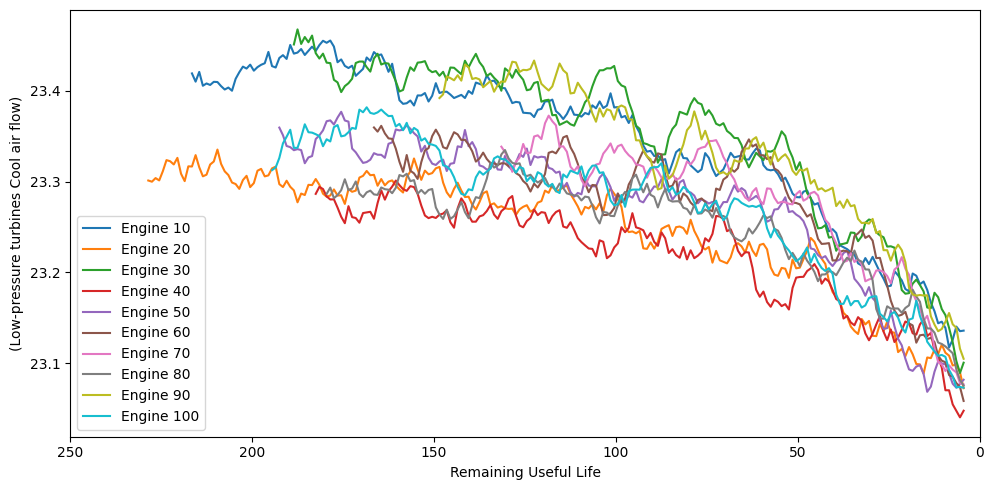

In [315]:

for i in range(2, 22):  # Column names start from 'sm2'
    try:
        plot(df_train, 'sm' + str(i), Sensor_dictionary)  # Use 'sm' instead of 'sm_'
    except Exception as e:
        print(f"Error plotting signal sm{i}: {e}")


for i in range(2, 22):  # Column names start from 'sm2'
    try:
        plot(df_train, 'sm' + str(i), Sensor_dictionary)  # Use 'sm' instead of 'sm_'
    except Exception as e:
        print(f"Error plotting signal sm{i}: {e}")


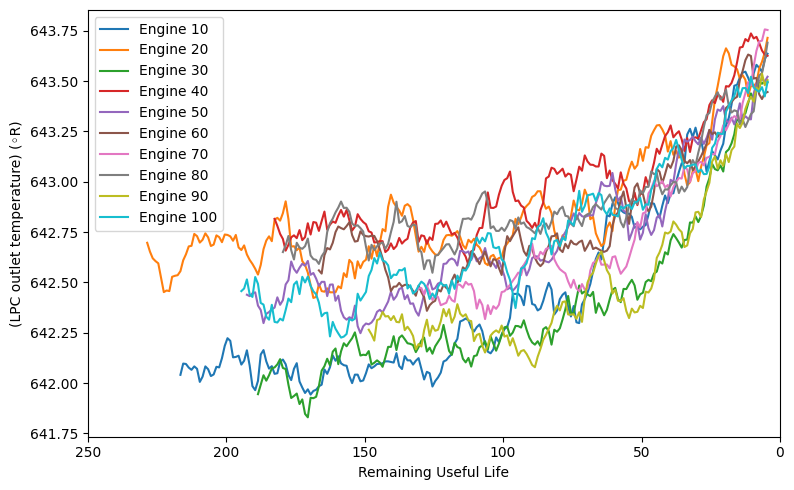

In [316]:
plt.figure(figsize=(8, 5))
for engine in df_train['engine'].unique():
    if engine % 10 == 0:
        rolling_window = df_train[df_train['engine'] == engine].rolling(10).mean()
        sns.lineplot(data=rolling_window, x='RUL', y='sm2', label=f'Engine {engine}')

plt.tight_layout()
plt.xlim(250, 0)
plt.xlabel("Remaining Useful Life")
plt.ylabel("(LPC outlet temperature) (◦R)")  # Use dictionary or fallback to column name
plt.show()

# model training

In [317]:
df_train.columns

Index(['engine', 'cycle_time', 'sm2', 'sm3', 'sm4', 'sm7', 'sm8', 'sm11',
       'sm12', 'sm13', 'sm14', 'sm15', 'sm17', 'sm20', 'sm21', 'RUL'],
      dtype='object')

In [318]:
df_val.columns

Index(['engine', 'cycle_time', 'sm2', 'sm3', 'sm4', 'sm7', 'sm8', 'sm9',
       'sm11', 'sm12', 'sm13', 'sm14', 'sm15', 'sm17', 'sm20', 'sm21'],
      dtype='object')

In [319]:
df_train.columns

Index(['engine', 'cycle_time', 'sm2', 'sm3', 'sm4', 'sm7', 'sm8', 'sm11',
       'sm12', 'sm13', 'sm14', 'sm15', 'sm17', 'sm20', 'sm21', 'RUL'],
      dtype='object')

In [320]:
df = df_train.drop(['engine', 'cycle_time'], axis = 1)


In [321]:
X = df.drop(['RUL'], axis= 1)
y = df['RUL']

In [322]:
X_train , X_test , y_train , y_test  = train_test_split(X, y, test_size=0.2 , random_state=42)

In [323]:
df_val.head()

,engine,cycle_time,sm2,sm3,sm4,sm7,sm8,sm9,sm11,sm12,sm13,sm14,sm15,sm17,sm20,sm21
0,1,1,643.02,1585.29,1398.21,553.90,2388.04,9050.17,47.20,521.72,2388.03,8125.55,8.4052,392,38.86,23.3735
1,1,2,641.71,1588.45,1395.42,554.85,2388.01,9054.42,47.50,522.16,2388.06,8139.62,8.3803,393,39.02,23.3916
2,1,3,642.46,1586.94,1401.34,554.11,2388.05,9056.96,47.50,521.97,2388.03,8130.10,8.4441,393,39.08,23.4166
3,1,4,642.44,1584.12,1406.42,554.07,2388.03,9045.29,47.28,521.38,2388.05,8132.90,8.3917,391,39.00,23.3737
4,1,5,642.51,1587.19,1401.92,554.16,2388.01,9044.55,47.31,522.15,2388.03,8129.54,8.4031,390,38.99,23.4130


In [324]:
X_val = df_val.groupby('engine').last().reset_index()

In [325]:
X_val = X_val.drop(['engine', 'cycle_time', 'sm9'], axis = 1)

In [326]:
X_train.columns

Index(['sm2', 'sm3', 'sm4', 'sm7', 'sm8', 'sm11', 'sm12', 'sm13', 'sm14',
       'sm15', 'sm17', 'sm20', 'sm21'],
      dtype='object')

In [327]:
X_test.columns

Index(['sm2', 'sm3', 'sm4', 'sm7', 'sm8', 'sm11', 'sm12', 'sm13', 'sm14',
       'sm15', 'sm17', 'sm20', 'sm21'],
      dtype='object')

In [328]:
X_val.columns

Index(['sm2', 'sm3', 'sm4', 'sm7', 'sm8', 'sm11', 'sm12', 'sm13', 'sm14',
       'sm15', 'sm17', 'sm20', 'sm21'],
      dtype='object')

# scaling the data 

In [329]:
print("X_train min:", X_train.min(axis=0), "X_train max:", X_train.max(axis=0))
print("X_test min:", X_test.min(axis=0), "X_test max:", X_test.max(axis=0))
print("X_val min:", X_val.min(axis=0), "X_val max:", X_val.max(axis=0))


X_train min: sm2      641.2500
sm3     1571.0400
sm4     1382.2500
sm7      549.8500
sm8     2387.9100
sm11      46.8600
sm12     518.6900
sm13    2387.8800
sm14    8099.9400
sm15       8.3249
sm17     388.0000
sm20      38.1400
sm21      22.8942
dtype: float64 X_train max: sm2      644.5300
sm3     1614.9300
sm4     1441.4900
sm7      556.0600
sm8     2388.5600
sm11      48.5300
sm12     523.3800
sm13    2388.5600
sm14    8293.7200
sm15       8.5848
sm17     400.0000
sm20      39.4300
sm21      23.6064
dtype: float64
X_test min: sm2      641.2100
sm3     1571.9900
sm4     1385.1900
sm7      550.3400
sm8     2387.9000
sm11      46.8500
sm12     518.9800
sm13    2387.9000
sm14    8101.4900
sm15       8.3428
sm17     389.0000
sm20      38.2200
sm21      22.9305
dtype: float64 X_test max: sm2      644.3100
sm3     1616.9100
sm4     1437.8800
sm7      555.7000
sm8     2388.3500
sm11      48.4000
sm12     523.1300
sm13    2388.3600
sm14    8279.8600
sm15       8.5836
sm17     398.0000
sm20 

In [330]:
scaler = StandardScaler()

# Fit on training data and transform
X_train_scaled = scaler.fit_transform(X_train)


X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

# Linear model

In [331]:
ln_model = LinearRegression()
ln_model.fit(X_train , y_train)

y_pred = ln_model.predict(X_train)

rmse = root_mean_squared_error(y_train , y_pred)
r2 = r2_score(y_train , y_pred)
print(f'for train set , RMSE = {rmse:0.2f} , r2_score = {r2*100:0.2f}%')


y_pred = ln_model.predict(X_test)
rmse = root_mean_squared_error(y_test , y_pred)
r2 = r2_score(y_test , y_pred)
print(f'for test set , RMSE = {rmse:0.2f} , r2_score = {r2*100:0.2f}%')


y_pred = ln_model.predict(X_val)
rmse = root_mean_squared_error(y_val , y_pred)
r2 = r2_score(y_val , y_pred)
print(f'for validation set , RMSE = {rmse:0.2f} , r2_score = {r2*100:0.2f}%')

for train set , RMSE = 44.82 , r2_score = 58.05%
for test set , RMSE = 44.29 , r2_score = 57.06%
for validation set , RMSE = 31.87 , r2_score = 41.18%


# Decision Tree

In [332]:

DT_model = DecisionTreeRegressor(random_state=42)
DT_model.fit(X_train , y_train)

y_pred = DT_model.predict(X_train)

rmse = root_mean_squared_error(y_train , y_pred)
r2 = r2_score(y_train , y_pred)
print(f'for train set , RMSE = {rmse:0.2f} , r2_score = {r2*100:0.2f}%')


y_pred = DT_model.predict(X_test)
rmse = root_mean_squared_error(y_test , y_pred)
r2 = r2_score(y_test , y_pred)
print(f'for test set , RMSE = {rmse:0.2f} , r2_score = {r2*100:0.2f}%')


y_pred = DT_model.predict(X_val)
rmse = root_mean_squared_error(y_val , y_pred)
r2 = r2_score(y_val , y_pred)
print(f'for validation set , RMSE = {rmse:0.2f} , r2_score = {r2*100:0.2f}%')

for train set , RMSE = 0.00 , r2_score = 100.00%
for test set , RMSE = 60.42 , r2_score = 20.09%
for validation set , RMSE = 51.13 , r2_score = -51.38%


# Random Forest model

In [333]:

RF_model = RandomForestRegressor(random_state=42,n_estimators=100)
RF_model.fit(X_train , y_train)

y_pred = RF_model.predict(X_train)

rmse = root_mean_squared_error(y_train , y_pred)
r2 = r2_score(y_train , y_pred)
print(f'for train set , RMSE = {rmse:0.2f} , r2_score = {r2*100:0.2f}%')


y_pred = RF_model.predict(X_test)
rmse = root_mean_squared_error(y_test , y_pred)
r2 = r2_score(y_test , y_pred)
print(f'for test set , RMSE = {rmse:0.2f} , r2_score = {r2*100:0.2f}%')


y_pred = RF_model.predict(X_val)
rmse = root_mean_squared_error(y_val , y_pred)
r2 = r2_score(y_val , y_pred)
print(f'for validation set , RMSE = {rmse:0.2f} , r2_score = {r2*100:0.2f}%')

for train set , RMSE = 15.77 , r2_score = 94.81%
for test set , RMSE = 41.59 , r2_score = 62.14%
for validation set , RMSE = 34.09 , r2_score = 32.72%


# hyper parameter tuning 

In [336]:
%%time
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from scipy.stats import randint   # it returen range of dist , not single value like np.random.randint
RandomForestRegressor()
param ={
    'max_depth' : [5 , 10,20] , 
    'min_samples_split' : randint(2,10) , 
    'min_samples_leaf' :  randint(1,5)
} 
random_search_forest = RandomizedSearchCV(estimator=RF_model , param_distributions=param , n_iter=10 ,
                  cv = 5 , scoring = 'r2' , random_state=42 , n_jobs=-1)
random_search_forest.fit(X_train , y_train)

CPU times: total: 9.67 s
Wall time: 1min 38s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 20],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000019F8A566410>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000019F90B0F610>},
                   random_state=42, scoring='r2')

In [337]:
df_res_forest = pd.DataFrame(random_search_forest.cv_results_).sort_values('mean_test_score')
df_res_forest[['mean_test_score' , 'params']]

,mean_test_score,params
9,0.606737,"{'max_depth': 5, 'min_samples_leaf': 1, 'min_s..."
2,0.606738,"{'max_depth': 5, 'min_samples_leaf': 1, 'min_s..."
5,0.606744,"{'max_depth': 5, 'min_samples_leaf': 4, 'min_s..."
6,0.632112,"{'max_depth': 20, 'min_samples_leaf': 2, 'min_..."
0,0.633100,"{'max_depth': 20, 'min_samples_leaf': 4, 'min_..."
1,0.633725,"{'max_depth': 20, 'min_samples_leaf': 3, 'min_..."
4,0.633725,"{'max_depth': 20, 'min_samples_leaf': 3, 'min_..."
7,0.635944,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_..."
8,0.636007,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_..."
3,0.636129,"{'max_depth': 10, 'min_samples_leaf': 3, 'min_..."


In [340]:
forest_model = random_search_forest.best_estimator_
print(RF_model)

y_pred = RF_model.predict(X_val)
rmse = root_mean_squared_error(y_val , y_pred)
r2 = r2_score(y_val , y_pred)
print(f'for validation set , RMSE = {rmse:0.2f} , r2_score = {r2*100:0.2f}%')

RandomForestRegressor(random_state=42)
for validation set , RMSE = 34.09 , r2_score = 32.72%


Text(0.5, 1.0, 'random forest model')

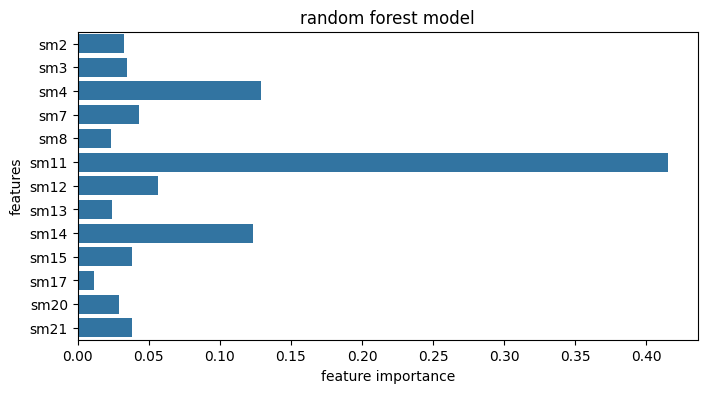

In [344]:
plt.figure(figsize = (8,4))
sns.barplot(y = X_train.columns , x = RF_model.feature_importances_ )
plt.xlabel('feature importance')
plt.ylabel('features')
plt.title('random forest model')

# LSTM

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'df_train' has a column 'RUL' for Remaining Useful Life (RUL)
X = df_train.drop(['RUL'], axis=1)  # Features (exclude 'RUL')
y = df_train['RUL']  # Target (Remaining Useful Life)

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

# Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Scale the training data
X_test_scaled = scaler.transform(X_test)  # Scale the test data

# Create sequences for training and test sets
sequence_length = 50  # Example sequence length

# Updated function for sequence creation
def create_sequences(data, sequence_length, target):
    sequences = []
    for i in range(sequence_length, len(data)):
        X_seq = data[i-sequence_length:i]
        y_seq = target.iloc[i]  # Access target by position
        sequences.append((X_seq, y_seq))
    return sequences

# Create sequences
train_sequences = create_sequences(X_train_scaled, sequence_length, y_train)
test_sequences = create_sequences(X_test_scaled, sequence_length, y_test)

# Unzip sequences into features and targets
X_train_seq, y_train_seq = zip(*train_sequences)
X_test_seq, y_test_seq = zip(*test_sequences)

# Convert to numpy arrays
import numpy as np
X_train_seq = np.array(X_train_seq)
y_train_seq = np.array(y_train_seq)
X_test_seq = np.array(X_test_seq)
y_test_seq = np.array(y_test_seq)

# Reshape for LSTM input
X_train_seq = X_train_seq.reshape((X_train_seq.shape[0], X_train_seq.shape[1], X_train_seq.shape[2]))
X_test_seq = X_test_seq.reshape((X_test_seq.shape[0], X_test_seq.shape[1], X_test_seq.shape[2]))

# LSTM model setup here (same as previous)


In [ ]:
# 4. Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])))
model.add(Dense(1))  # Output layer for RUL prediction

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# 5. Train the model
history = model.fit(X_train_seq, y_train_seq, epochs=20, batch_size=32, validation_data=(X_test_seq, y_test_seq))


In [ ]:

# 6. Evaluate the model on the test data
y_pred = model.predict(X_test_seq)

# Evaluate the model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test_seq, y_pred)
mse = mean_squared_error(y_test_seq, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")


In [ ]:
df_val.drop(['sm9'], axis = 1, inplace = True)

In [ ]:
# Grouping by 'engine' and taking the last cycle for each engine
X_val = df_val.groupby('engine').last().reset_index()


In [ ]:
X_val_scaled = scaler.transform(X_val)

In [ ]:
val_sequences = create_sequences(X_val_scaled, sequence_length, y_val)
X_val_seq, y_val_seq = zip(*val_sequences)

In [ ]:
X_val_seq = np.array(X_val_seq)
y_val_seq = np.array(y_val_seq)

In [ ]:

X_val_seq = X_val_seq.reshape((X_val_seq.shape[0], X_val_seq.shape[1], X_val_seq.shape[2]))


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Predict on validation data
y_val_pred = model.predict(X_val_seq)

# Calculate metrics
val_mae = mean_absolute_error(y_val_seq, y_val_pred)
val_mse = mean_squared_error(y_val_seq, y_val_pred)
val_rmse = np.sqrt(val_mse)

print(f"Validation Mean Absolute Error: {val_mae}")
print(f"Validation Mean Squared Error: {val_mse}")
print(f"Validation Root Mean Squared Error: {val_rmse}")


In [ ]:
df_val_comparison = pd.DataFrame({
    'Actual RUL': y_val_seq.flatten(),  # Flatten to make it a 1D array
    'Predicted RUL': y_val_pred.flatten()  # Flatten to make it a 1D array
})

# Display the DataFrame
print(df_val_comparison)

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()